# Load Imports

In [1]:
# python imports
import os
import re
import json
from math import pi

# third-party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

# Config

In [3]:
ANALYST_NAME = 'analyst-name'

DRAW_TITLE = False

SAVE_FIG = True
EXTENSION = 'pdf'

# Utils

In [4]:
def get_values(values, index):
    types = {'accuracy': 0, 'precision': 1, 'recall': 2, 'f1': 3}   
    return [val[types[index]] for val in values]

In [5]:
def draw_graph(index):
    fig, ax = plt.subplots(figsize=(6, 4))

    acc_active = get_values(active_stats, index)
    acc_super = get_values(super_stats, index)

    ax.plot(range(len(acc_active)), acc_active, label='Active Learning Labeling (ALL)')
    ax.plot(range(len(acc_super)), acc_super, label='Random Selection Labeling (RSL)')
    
    if DRAW_TITLE:
        ax.set_title(f'{index.capitalize()} Evolution')
        
    # ax.set_ylabel(f'{index.capitalize()} Values (%)')
    # ax.set_xlabel('Number of Labelled Instances')
    ax.set_ylabel('Accuracy Values (%)')
    ax.set_xlabel('Number of Labeled Instances')    
    
    ax.set_xticklabels(list(range(0, 140, 20)))

    ax.legend(prop={'size': 11})
    ax.grid(True, linestyle='--', alpha=.25)
    
    active_super_diff = acc_active[99] - acc_super[99]
    active_diff = acc_active[99] - acc_active[0]
    super_diff = acc_super[99] - acc_super[0]
    
    print(f'abs active super diff: {active_super_diff:.2f}')
    print(f'abs active start end diff: {active_diff:.2f}')
    print(f'abs super start end diff: {super_diff:.2f}')
    
    active_diff = active_diff / acc_active[0]
    super_diff = super_diff / acc_super[0]

    ax.annotate(f'Percentage Increase in ALL ({active_diff:.2f}%)',
                xy=(99, acc_active[99]), xycoords='data',
                bbox=dict(boxstyle='round,pad=0.2', fc='whitesmoke', alpha=0.9),
                xytext=(-190, -60), textcoords='offset points')

    ax.annotate('', xy=(99, acc_active[99]), xytext=(99, acc_active[0]),
                arrowprops=dict(arrowstyle="<->", color='black', linestyle='--', alpha=.85))

    ax.annotate(f'Percentage Increase in RSL ({super_diff:.2f}%)',
                xy=(99, acc_super[99]), xycoords='data',
                bbox=dict(boxstyle='round,pad=0.2', fc='whitesmoke', alpha=0.9),
                xytext=(-190, -18), textcoords='offset points')

    ax.annotate('', xy=(99, acc_super[99]), xytext=(99, acc_super[0]),
                arrowprops=dict(arrowstyle="<->", color='black', linestyle='--', alpha=.85))

    plt.axhline(acc_active[0], color = 'black', linestyle = '--', alpha=.6)
    plt.axhline(acc_super[0], color = 'black', linestyle = '--', alpha=.6)
    
    if SAVE_FIG:
        plt.savefig(f'al-oline-labelling.{EXTENSION}', bbox_inches='tight', dpi=1200)

    plt.show()

# Load Results

In [6]:
active_stats = list()
super_stats = list()

for filename, variable in zip(['active', 'super'], [active_stats, super_stats]):
    with open(f'../results/{ANALYST_NAME}/{filename}-stats.txt') as f:
        for line in f.readlines():
            values = list(map(float, line.strip().split(' ')))
            variable.append(values)

abs active super diff: 0.42
abs active start end diff: 0.37
abs super start end diff: 0.10


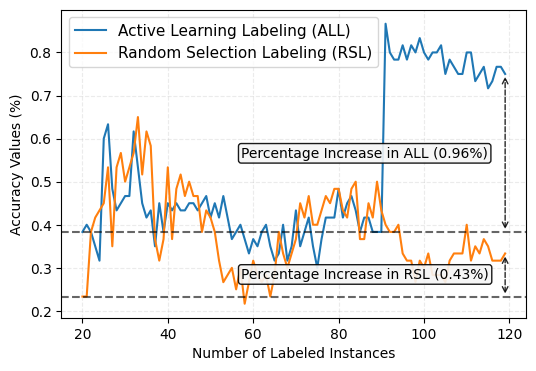

In [7]:
draw_graph('accuracy')  # accuracy | precision | recall | f1